# PHYS-E0412 Computational Physics :: Homework 12
Ari Viitala 432568

In [28]:
import numpy as np
import matplotlib.pyplot as plt

(98, 98)
(98,)
1.3962168943909294
0.4347384786398678
0.13767221275685365
0.044205816570393984
0.014449335053996424
0.0048497129425066135
0.0016904875750261628
0.0006183161960799465
0.00023833013427251499
9.642277970967304e-05


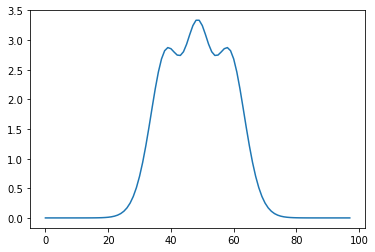

In [56]:
N = 100
nocc = 3

nuclei = np.array([np.pi / 2])

L = np.pi
h = L/N
x = np.linspace(0, L, N)[1:-1]

T = np.zeros((N-2, N-2))

T += -2 * np.eye(N-2) + np.eye(N-2, k=1) + np.eye(N-2, k=-1)
T *= -1/2 * 1/h**2  

Vext = np.zeros_like(x)

for i in range(len(nuclei)):
    v = -85 * np.exp(-2 * (x - nuclei[i])**2)
    Vext += v    
    
mix = 0.5
maxiter = 100
tol = 0.001
delta = 0.01

H = T + np.diag(Vext)

a, b = np.linalg.eigh(H)

b /= np.sqrt(np.trapz(np.abs(b)**2, x=x, axis = 1))
print(b.shape)
dens_init = np.sum(b[:,:nocc]**2, axis = 1)
print(dens_init.shape)
plt.plot(dens_init)
dens = dens_init

for i in range(maxiter):
    
    Vxc = -dens**(1/3)
    
    Vh = np.zeros(N-2)
    
    for i in range(len(x)):
        Vh[i] = np.trapz(dens / (np.abs(x[i] - x) + delta), x=x)
    
    Veff = Vext + Vh + Vxc
                         
    H = T + np.diag(Veff)
                         
    a, b = np.linalg.eigh(H)
    
    b /= np.sqrt(np.trapz(np.abs(b)**2, x=x))
    
    dens_old = dens
    
    dens = np.sum(b[:,:nocc]**2, axis = 1)
    
    dens = (1 - mix) * dens_old + mix * dens
    
    print(np.linalg.norm(dens - dens_old))
    if np.sum(abs(dens - dens_old)) < tol:
        break

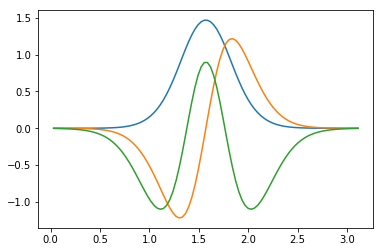

In [57]:
for i in range(3):
    plt.plot(x, b[:,i])

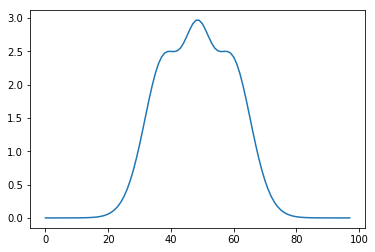

In [59]:
plt.plot(dens)

In [86]:
energies = []
dists = []
steps = 50
dists = np.linspace(0.05, 0.9, steps) *np.pi

for i in range(steps):
    
    N = 100
    nocc = 6
    
    dist = dists[i]
    print(dist)
    nuclei = np.array([np.pi / 2 - dist / 2, np.pi / 2 + dist / 2])

    L = np.pi
    h = L/N
    x = np.linspace(0, L, N)[1:-1]

    T = np.zeros((N-2, N-2))

    T += -2 * np.eye(N-2) + np.eye(N-2, k=1) + np.eye(N-2, k=-1)
    T *= -1/2 * 1/h**2  

    Vext = np.zeros_like(x)

    for i in range(len(nuclei)):
        v = -85 * np.exp(-2 * (x - nuclei[i])**2)
        Vext += v    

    mix = 0.5
    maxiter = 100
    tol = 0.001
    delta = 0.01

    H = T + np.diag(Vext)

    a, b = np.linalg.eigh(H)

    b /= np.sqrt(np.trapz(np.abs(b)**2, x=x, axis = 1))
    dens_init = np.sum(b[:,:nocc]**2, axis = 1)
    
    dens = dens_init

    for i in range(maxiter):
        
        Vxc = -dens**(1/3)

        Vh = np.zeros(N-2)

        for i in range(len(x)):
            Vh[i] = np.trapz(dens / (np.abs(x[i] - x) + delta), x=x)

        Veff = Vext + Vh + Vxc

        H = T + np.diag(Veff)

        a, b = np.linalg.eigh(H)

        b /= np.sqrt(np.trapz(np.abs(b)**2, x=x))

        dens_old = dens

        dens = np.sum(b[:,:nocc]**2, axis = 1)

        dens = (1 - mix) * dens_old + mix * dens
            
            
        if np.sum(abs(dens - dens_old)) < tol:
            break
    
    E = np.sum(a[:nocc]) - 0.5 * np.trapz(Vh * dens, x = x) + 9 / (nuclei[0] - nuclei[1])**2
    
    energies.append(E)

0.15707963267948966
0.21157664809890445
0.26607366351831924
0.320570678937734
0.37506769435714876
0.4295647097765636
0.4840617251959784
0.5385587406153931
0.5930557560348079
0.6475527714542226
0.7020497868736375
0.7565468022930523
0.8110438177124669
0.8655408331318817
0.9200378485512966
0.9745348639707113
1.029031879390126
1.0835288948095407
1.1380259102289556
1.1925229256483705
1.2470199410677851
1.3015169564872
1.3560139719066149
1.4105109873260295
1.4650080027454442
1.519505018164859
1.574002033584274
1.6284990490036886
1.6829960644231035
1.7374930798425186
1.7919900952619332
1.8464871106813479
1.9009841261007627
1.9554811415201774
2.0099781569395923
2.064475172359007
2.1189721877784216
2.1734692031978367
2.2279662186172513
2.2824632340366664
2.336960249456081
2.3914572648754957
2.4459542802949104
2.500451295714325
2.55494831113374
2.6094453265531548
2.66394234197257
2.7184393573919845
2.772936372811399
2.827433388230814


In [87]:
np.sum(a[:6])

-113.79005054737574

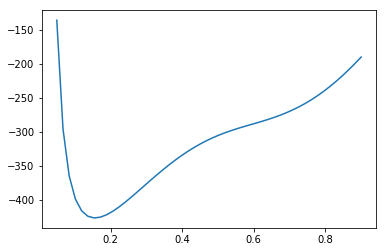

In [88]:
plt.plot(dists / np.pi, energies)

In [92]:
print("Distance at minimum: {}".format(dists[np.argmin(energies)]))
print("Energy at minimum: {}".format(np.min(energies)))

Distance at minimum: 0.4840617251959784
Energy at minimum: -426.21724756097916
